[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.ornl.gov/ct-reconstruction/)

<img src='__docs/notebook_rules.png' />

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib notebook

import imars3d
# print(f"Using imarsd version {imars3d.__version__}")

from __code.laminographyui import LaminographyUi
#from __code.roi_selection_ui import Interface

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

%matplotlib notebook

# Select input data 

## raw data

In [2]:
o_imars3dui = LaminographyUi(working_dir=system.System.get_working_dir())
o_imars3dui.select_raw()

version 07-30-2024


raw folder selected: ['/HFIR/CG1D/IPTS-33592/raw/ct_scans/2024_07_03_lam_circuit_small'] with 2118 files)


## ob 

In [3]:
o_imars3dui.select_ob()

ob folder selected: ['/HFIR/CG1D/IPTS-33592/raw/ob/2024_07_03_lam_circuit_small'] with 5 files)


## dc 

In [4]:
o_imars3dui.select_dc_options()

Checkbox(value=True, description='Use dark current')

In [5]:
o_imars3dui.select_dc()

Not using any DC!


# Load

In [6]:
%matplotlib inline

ct:   0%|          | 0/2118 [00:00<?, ?it/s]

ob:   0%|          | 0/5 [00:00<?, ?it/s]

dc:   0%|          | 0/1 [00:00<?, ?it/s]

np.shape(self.parent.proj_raw) =(2118, 6400, 6400)
np.shape(self.parent.proj_raw[0]) =(6400, 6400)
Before conversion: self.parent.proj_raw.dtype= dtype('uint16')


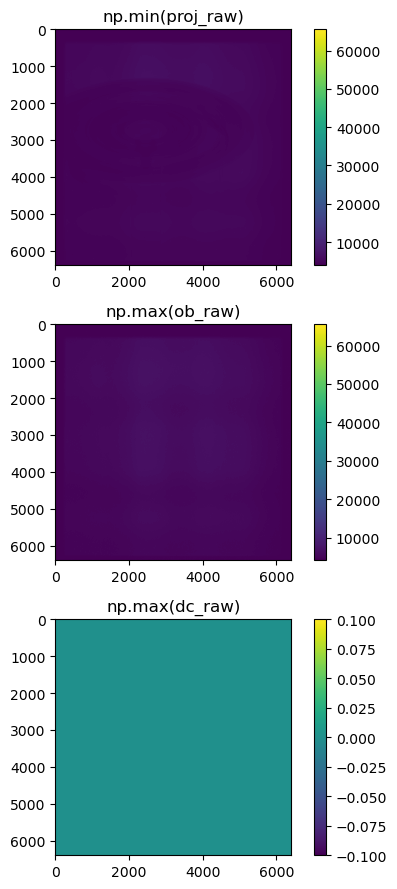

In [7]:
o_imars3dui.load_and_display_data()

### Advanced visualization of loaded data 

In [8]:
o_imars3dui.investigate_loaded_data_flag()

Checkbox(value=False, description='Investigate data')

In [9]:
o_imars3dui.investigate_loaded_data()

No advanced visualization of loaded data requested!


# Crop

### select crop region

In [10]:
o_imars3dui.crop_embedded()

interactive(children=(IntSlider(value=0, description='left', max=6399), IntSlider(value=6399, continuous_updat…

### perform cropping 

In [11]:
o_imars3dui.perform_embedded_cropping()

Running crop ...
cropping done!


# Gamma filtering  (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [12]:
o_imars3dui.gamma_filtering_options()

Checkbox(value=False, description='Gamma filtering')

In [ ]:
o_imars3dui.gamma_filtering()

Running gamma filtering ...


# Normalization (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

Running normalization ...
normalization done in 35.05s


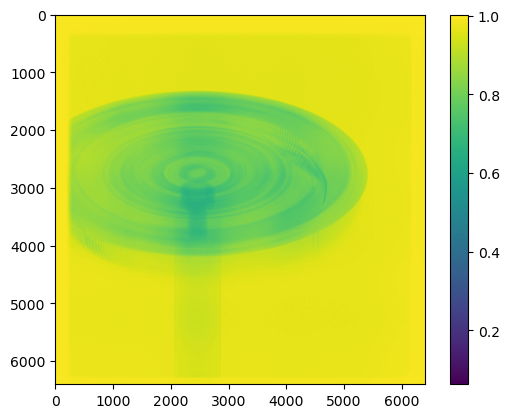

In [14]:
o_imars3dui.normalization_and_display()

# Beam fluctuation correction

### Select a region that does not contain the sample to improve the normalization

In [15]:
o_imars3dui.beam_fluctuation_correction_option()

Checkbox(value=False, description='Beam fluctuation correction')

### define beam fluctuation settings (if requested) 

In [16]:
o_imars3dui.define_beam_fluctuation_settings()

### perform beam fluctuation correction (if requested)

In [17]:
o_imars3dui.run_beam_fluctuation_correction()

# Transmission to attenuation

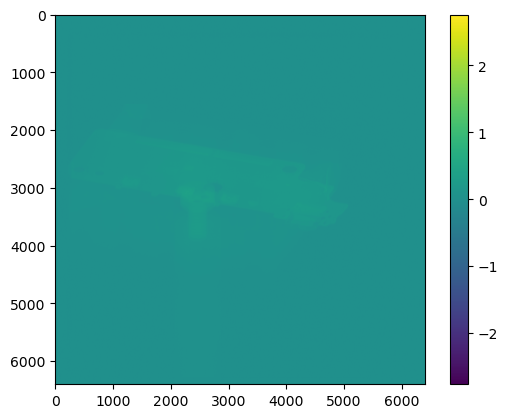

In [18]:
o_imars3dui.minus_log_and_display()

# Tilt calculation (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

The tilt will be calculated and tested on the data set, but only applied during the reconstruction phase!

## find 0 and 180 degrees files

In [19]:
o_imars3dui.find_0_180_degrees_files()

## calculate tilt 

In [20]:
o_imars3dui.calculate_tilt()

## Slices to use to test tilt calculation 

In [21]:
o_imars3dui.test_tilt_slices_selection()

interactive(children=(IntSlider(value=50, description='slice1', max=6399), IntSlider(value=6350, description='…

## testing tilt on selected algorithms (Zzz) 

In [22]:
o_imars3dui.testing_tilt_on_selected_algorithms()

IntProgress(value=0, description='Progress:', max=5)

INFO:imars3d.backend.diagnostics.tilt:Executing Filter: Tilt correction
INFO:imars3d.backend.diagnostics.tilt:3D array detected, applying tilt correction with tilt = 0.000 deg


Running user ... 

Applying tilt corr:   0%|          | 0/424 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:Executing Filter: Find Rotation Center
INFO:imars3d.backend.util.functions:Due to system load, setting maximum workers to 6
INFO:imars3d.backend.diagnostics.rotation:Using all pairs of angles


Done!


Finding rotation center:   0%|          | 0/425 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:FINISHED Executing Filter: Find Rotation Center


interactive(children=(ToggleButtons(description='Algorithm:', disabled=True, options=('user',), value='user'),…

## Display data with tilt corrected 

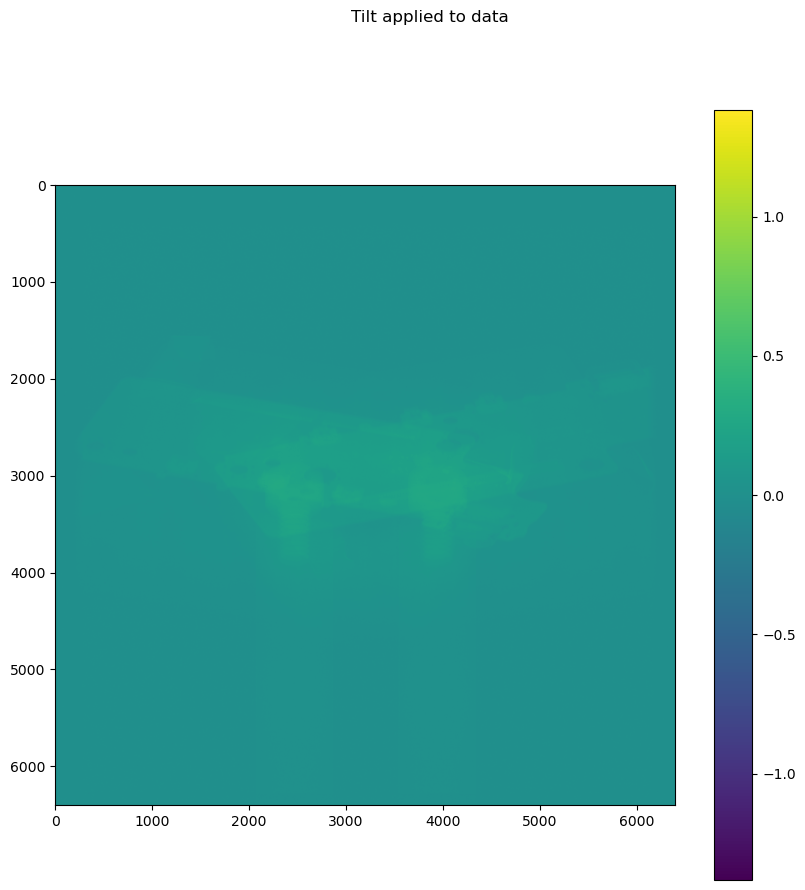

In [23]:
o_imars3dui.display_with_tilt()

# Filtering

* remove negative values

In [24]:
o_imars3dui.filter_options()

Checkbox(value=False, description='Remove negative values')

In [25]:
o_imars3dui.apply_filter_options()

 Skipped remove negative values!


# Display sinogram 

In [26]:
o_imars3dui.create_and_display_sinogram()

interactive(children=(IntSlider(value=0, description='index', max=6400), Output()), _dom_classes=('widget-inte…

# Ring removal 

## Select 

In [27]:
o_imars3dui.ring_removal_options()

In [28]:
o_imars3dui.apply_ring_removal_options()

No strikes removal using BM3D
No strikes removal using Vo
No strikes removal using Ketcham


# Reconstruction 

### Set up range of slices to reconstruct 

In [29]:
o_imars3dui.select_range_of_slices()

interactive(children=(IntSlider(value=0, continuous_update=False, description='top', max=6399), IntSlider(valu…

### Set up paremeters 

In [30]:
o_imars3dui.laminography_settings()

### Run laminography reconstruction 

In [ ]:
o_imars3dui.run_laminography()

INFO:imars3d.backend.morph.crop:Executing Filter: Crop
INFO:imars3d.backend.morph.crop:FINISHED Executing Filter: Crop


# Visualize reconstruction

In [ ]:
o_imars3dui.visualize_reconstruction()

# Export


In [ ]:
o_imars3dui.export()